In [ ]:
 import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AC_Data.csv to AC_Data.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['AC_Data.csv']))

In [ ]:
print(df.max())

minute data    31-08-2019 23:59
AC 1                    11.1948
AC 2                    11.1471
AC 3                    8.43091
AC 4                     9.8795
AC 5                    5.49536
AC 6                    9.92929
AC 7                    9.35678
AC 8                    9.33151
AC 9                    10.0267
AC 10                   4.62503
AC 11                   10.3632
AC 12                   9.88731
AC 13                   9.79639
AC 14                   9.05497
AC 15                     10.35
AC 16                   10.6544
AC 17                   5.95026
AC 18                     11.04
dtype: object


From sum below:

we find that ((AC 5)) has lowest power consumption so it was used least.

we find ((AC 18)) has highest power consumption so it was used the most.


In [ ]:
print(df.sum())

minute data    01-08-2019 00:0001-08-2019 00:0101-08-2019 00:...
AC 1                                                      103997
AC 2                                                      169113
AC 3                                                      112273
AC 4                                                      104678
AC 5                                                       62151
AC 6                                                      110085
AC 7                                                      130202
AC 8                                                      111389
AC 9                                                      139011
AC 10                                                    67210.2
AC 11                                                     105076
AC 12                                                     118009
AC 13                                                     187113
AC 14                                                     127467
AC 15                    

Source of data:

NASA/POWER SRB/FLASHFlux/MERRA2/GEOS 5.12.4 (FP-IT) 0.5 x 0.5 Degree Daily Averaged Data

Reference :https://power.larc.nasa.gov/data-access-viewer/

Dates (month/day/year): 08/01/2019 through 09/30/2019 							
Location: Latitude  28.4796   Longitude 77.0716 							
Elevation from MERRA-2: Average for 1/2x1/2 degree lat/lon region = 215.08 meters 							
							
Parameter(s):

T2M_MIN MERRA2 1/2x1/2 Minimum Temperature at 2 Meters (C) 							
T2M MERRA2 1/2x1/2 Temperature at 2 Meters (C) 							
T2M_MAX MERRA2 1/2x1/2 Maximum Temperature at 2 Meters (C)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Temperature.csv to Temperature (1).csv


In [ ]:
import io
temp_data = pd.read_csv(io.BytesIO(uploaded['Temperature.csv']))

In [ ]:
temp_data

,Date,Year,Month,Date.1,T2M_MAX,T2M_MIN,T2M
0,01-08-2019,2019,8,1,35.91,27.07,31.42
1,02-08-2019,2019,8,2,35.39,27.77,30.83
2,03-08-2019,2019,8,3,32.00,27.50,29.42
3,04-08-2019,2019,8,4,32.00,27.01,29.64
4,05-08-2019,2019,8,5,36.05,27.23,31.80
...,...,...,...,...,...,...,...
56,26-09-2019,2019,9,26,29.92,24.13,26.63
57,27-09-2019,2019,9,27,31.00,23.62,27.02
58,28-09-2019,2019,9,28,30.96,24.12,26.71
59,29-09-2019,2019,9,29,31.37,23.44,26.70


Mostly generated by electricity and recorded by satellites, night light has a strong linear relationship with electricity consumption and is correlated with both its extensive and intensive margins. Using night light as a proxy for electricity consumption at the grid level, we find: 

(1) there is a U-shaped relationship between electricity consumption and temperature.  A rising temperature would mean
increasing electricity demand. 

(2) the critical point of temperature for minimum electricity consumption is around 14.6°C for the world and it is higher in urban and more industrial areas

(3) A 1°C increase in temperature is estimated to increase electricity demand by 6.7% on average.

The critical point in Gurgaon is more as the demand of electricity is higher because of MNC'S and industries.

We find average temp in Gurgaon in August is 30.081290322581
and in september is 29.485666666667 

In [ ]:
#average power consumption in aug
aug_con = df.loc["01-08-2019  00:00:00":"31-08-2019  23:59:00"]
c = aug_con.mean()
c.mean()

2.983822504443973

In [ ]:
#average temperature in august
aug_temp = temp_data.iloc[:30]
avg = aug_temp["T2M"].mean()
avg

30.028333333333332

In [ ]:
#average power consumption in september
sep_con = df.loc["01-09-2019  00:00:00":"30-09-2019  23:59:00"]
d = sep_con.mean()
d.mean()

2.97104738940123

In [ ]:
#average temperature in september
sep_temp = temp_data.iloc[31:]
b = sep_temp["T2M"].mean()
b

29.485666666666663

From above we observe that in August, Average Temperature is 30.2 degree celsius which is more than that in september which is 29.48 degree celcius which leads to following observation:

--- There is higher average power consumption in August as compared to in September.----- 

hence we coclude that:

1.) The power consumed by different AC's is directly proportional to outside temperature

2.) we can see linear relationship between power consumption and outside temperature'

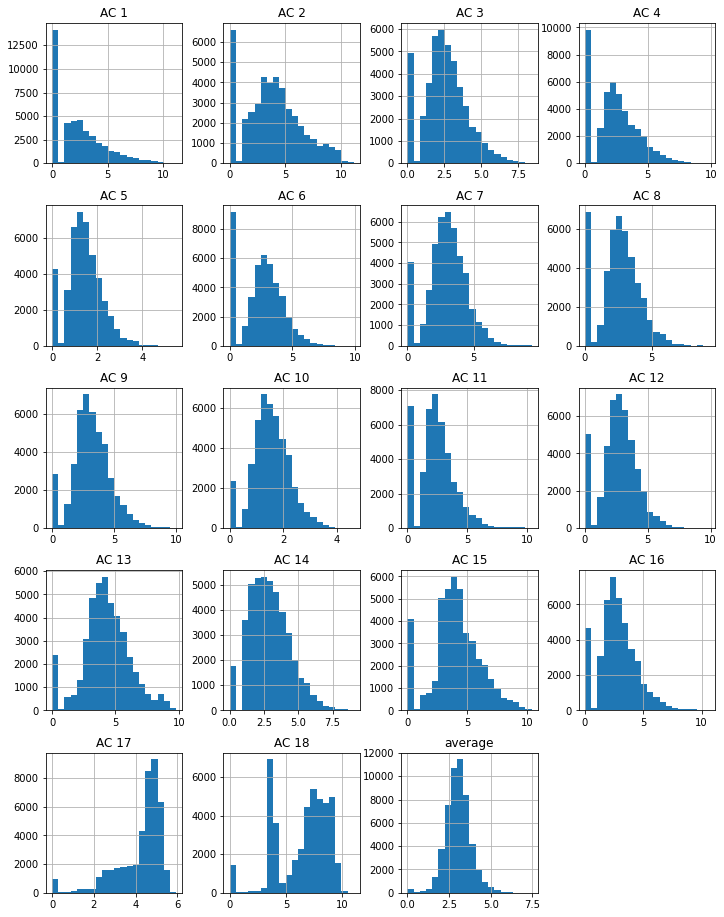

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(12,16))
plt.savefig("Attribute Histogram Plots")
plt.show()

In [ ]:
df['average'] = df.mean(numeric_only=True, axis=1)

In [ ]:
import numpy as np
concatenated = pd.concat([df.assign(dataset='df'), temp_data.assign(dataset='temp_data')])
concatenated.dropna()
concatenated.round(2)

,minute data,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,average,dataset,Date,Year,Month,Date.1,T2M_MAX,T2M_MIN,T2M
0,01-08-2019 00:00,7.52,8.79,0.0,0.0,2.62,4.08,2.78,4.62,5.22,2.15,1.59,0.56,3.14,2.75,5.42,4.11,3.31,6.74,3.63,df,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-08-2019 00:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,df,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-08-2019 00:02,7.43,8.94,0.0,0.0,2.58,3.78,2.53,5.06,5.35,2.41,2.17,1.82,3.09,2.72,3.30,3.99,3.22,6.38,3.60,df,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-08-2019 00:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,df,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-08-2019 00:04,7.05,9.16,0.0,0.0,2.59,3.80,2.33,6.32,4.00,2.24,3.35,2.31,3.13,2.68,3.54,3.80,3.13,6.36,3.66,df,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,temp_data,26-09-2019,2019.0,9.0,26.0,29.92,24.13,26.63
57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,temp_data,27-09-2019,2019.0,9.0,27.0,31.00,23.62,27.02
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,temp_data,28-09-2019,2019.0,9.0,28.0,30.96,24.12,26.71
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,temp_data,29-09-2019,2019.0,9.0,29.0,31.37,23.44,26.70


In [ ]:
concatenated.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 87901 entries, 0 to 60
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   minute data  87840 non-null  object 
 1   AC 1         43708 non-null  float64
 2   AC 2         43711 non-null  float64
 3   AC 3         43713 non-null  float64
 4   AC 4         43704 non-null  float64
 5   AC 5         43716 non-null  float64
 6   AC 6         43717 non-null  float64
 7   AC 7         43679 non-null  float64
 8   AC 8         43704 non-null  float64
 9   AC 9         43654 non-null  float64
 10  AC 10        43690 non-null  float64
 11  AC 11        43670 non-null  float64
 12  AC 12        43713 non-null  float64
 13  AC 13        43719 non-null  float64
 14  AC 14        43696 non-null  float64
 15  AC 15        43715 non-null  float64
 16  AC 16        43710 non-null  float64
 17  AC 17        43714 non-null  float64
 18  AC 18        43723 non-null  float64
 19  average

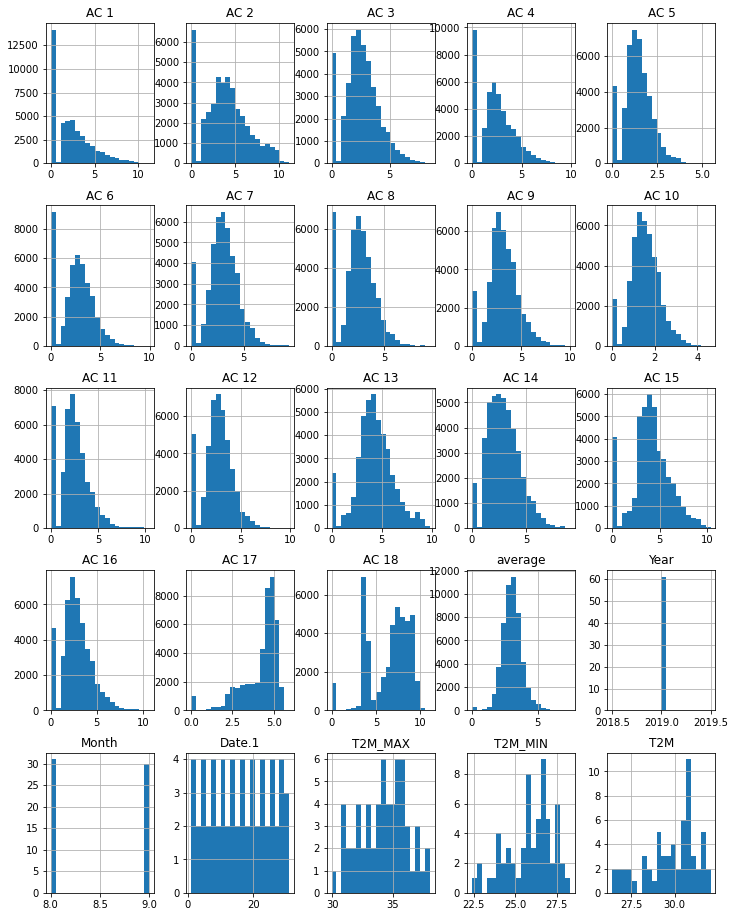

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
concatenated.hist(bins=20, figsize=(12,16))
plt.show()

 Windspeed is least important as the speed of wind doesn’t affect power consumption inside the house. So controlling humidity inside the house may lead to energy savings.